# Ideal Parameters Summary

Step size: $0.05$ (all ideal parameters were included in the grid search)

EEG sample frequency, fMRI TR, and the hemodynamic response window were held constant.

Missing data did not have a strong effect on results, so only complete data are shown here.

In [8]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import sys

from datetime import datetime

sys.path.append('../../feeg_fmri_sync')

from feeg_fmri_sync.plotting import (
    plot_all_search_results_2d,
    plot_local_minima
)
from feeg_fmri_sync.search import (
    build_models,
    search_voxels
)
from feeg_fmri_sync.simulations import (
    generate_downsampled_simulated_fmri,
)
from feeg_fmri_sync.utils import (
    get_est_hemodynamic_response,
    get_hdr_for_eeg,
    get_ratio_eeg_freq_to_fmri_freq,
    downsample_hdr_for_eeg,
)
from feeg_fmri_sync.vectorized_models import VectorizedHemodynamicModel

from tests.helpers import load_test_eeg_without_nans

## Initialize constants for Hemodynamic Modeling

In [25]:
### Initialize constants ###
eeg_sample_freq = 20
tr = 800
n_trs_skipped_at_beginning = 0
hemodynamic_response_window = 30

# Actual Values to generate data from
expected_delta_range = [1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3]
expected_tau_range = [0.75, 0.95, 1.15, 1.25, 1.35, 1.55, 1.75]
expected_alpha_range = [1.75, 1.85, 1.95, 2, 2.05, 2.15, 2.25]

# EEG data to use
eeg_data = load_test_eeg_without_nans(eeg_sample_freq)


time_steps = np.arange(hemodynamic_response_window * eeg_sample_freq + 1) / eeg_sample_freq
r_fmri = get_ratio_eeg_freq_to_fmri_freq(eeg_sample_freq, tr)


# Plotting time steps
time_steps_for_eeg = np.arange(len(eeg_data.data)) / eeg_data.sample_frequency
time_steps_for_fmri = time_steps_for_eeg[::r_fmri]

## Affect of Ideal Parameters on Simulated Ground Truth: 

In [70]:
step = 0.1
ideal_delta = 2.25
ideal_tau = 1.25
ideal_alpha = 2
consistent_step_delta_range = np.arange(
    expected_delta_range[0], 
    expected_delta_range[-1]+step,
    step=step
).round(2)
consistent_step_tau_range = np.arange(
    expected_tau_range[0], 
    expected_tau_range[-1]+step,
    step=step
).round(2)
consistent_step_alpha_range = np.arange(
    expected_alpha_range[0], 
    expected_alpha_range[-1]+step,
    step=step
).round(2)

fmri_hdr_lookup = {}

# Precalculate
for delta in np.concatenate([consistent_step_delta_range, np.array([2.25])]):
    for tau in consistent_step_tau_range:
        for alpha in np.concatenate([consistent_step_alpha_range, np.array([2])]):
            hrf = get_est_hemodynamic_response(
                time_steps, 
                delta, 
                tau, 
                alpha
            )
            hdr_for_eeg = get_hdr_for_eeg(eeg_data.data, hrf)
            fmri_hdr_for_eeg = downsample_hdr_for_eeg(r_fmri, hdr_for_eeg)
            fmri_hdr_lookup[(delta, tau, alpha)] = fmri_hdr_for_eeg

In [71]:
for key in fmri_hdr_lookup.keys():
    print(key)

(1.0, 0.75, 1.75)
(1.0, 0.75, 1.85)
(1.0, 0.75, 1.95)
(1.0, 0.75, 2.05)
(1.0, 0.75, 2.15)
(1.0, 0.75, 2.25)
(1.0, 0.75, 2.35)
(1.0, 0.75, 2.0)
(1.0, 0.85, 1.75)
(1.0, 0.85, 1.85)
(1.0, 0.85, 1.95)
(1.0, 0.85, 2.05)
(1.0, 0.85, 2.15)
(1.0, 0.85, 2.25)
(1.0, 0.85, 2.35)
(1.0, 0.85, 2.0)
(1.0, 0.95, 1.75)
(1.0, 0.95, 1.85)
(1.0, 0.95, 1.95)
(1.0, 0.95, 2.05)
(1.0, 0.95, 2.15)
(1.0, 0.95, 2.25)
(1.0, 0.95, 2.35)
(1.0, 0.95, 2.0)
(1.0, 1.05, 1.75)
(1.0, 1.05, 1.85)
(1.0, 1.05, 1.95)
(1.0, 1.05, 2.05)
(1.0, 1.05, 2.15)
(1.0, 1.05, 2.25)
(1.0, 1.05, 2.35)
(1.0, 1.05, 2.0)
(1.0, 1.15, 1.75)
(1.0, 1.15, 1.85)
(1.0, 1.15, 1.95)
(1.0, 1.15, 2.05)
(1.0, 1.15, 2.15)
(1.0, 1.15, 2.25)
(1.0, 1.15, 2.35)
(1.0, 1.15, 2.0)
(1.0, 1.25, 1.75)
(1.0, 1.25, 1.85)
(1.0, 1.25, 1.95)
(1.0, 1.25, 2.05)
(1.0, 1.25, 2.15)
(1.0, 1.25, 2.25)
(1.0, 1.25, 2.35)
(1.0, 1.25, 2.0)
(1.0, 1.35, 1.75)
(1.0, 1.35, 1.85)
(1.0, 1.35, 1.95)
(1.0, 1.35, 2.05)
(1.0, 1.35, 2.15)
(1.0, 1.35, 2.25)
(1.0, 1.35, 2.35)
(1.0, 1.35, 2.0)

### $\Delta\delta$

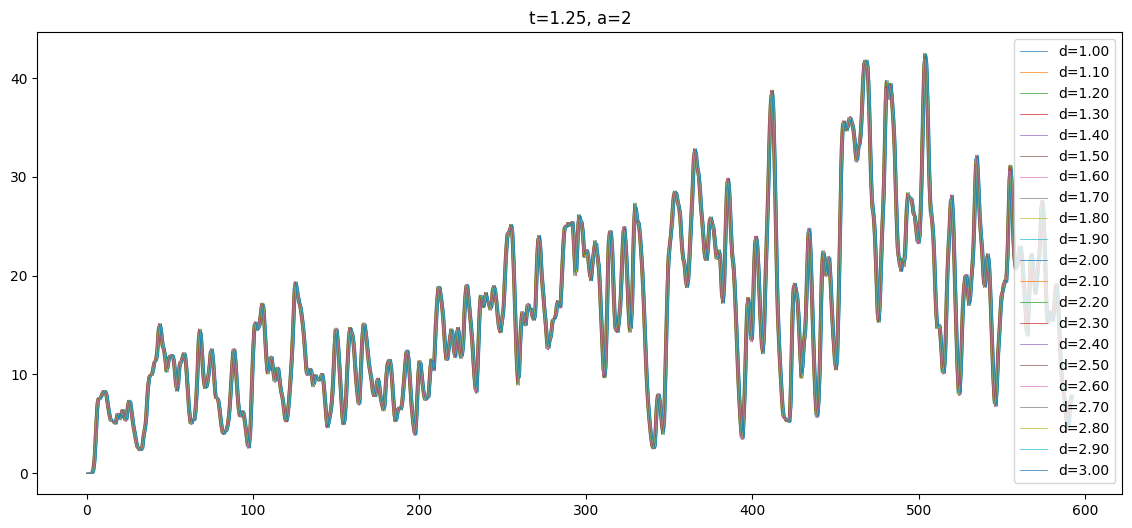

In [72]:
plt.figure(figsize=(14,6))
plt.title(f't={ideal_tau}, a={ideal_alpha}')
for delta in consistent_step_delta_range:
    fmri_hdr_for_eeg = fmri_hdr_lookup[(delta, ideal_tau, ideal_alpha)]
    plt.plot(
        time_steps_for_fmri, 
        fmri_hdr_for_eeg,
        label=f'd={delta:.2f}',
        linewidth=0.5,
    )
plt.legend()
plt.show()

### $\Delta\tau$

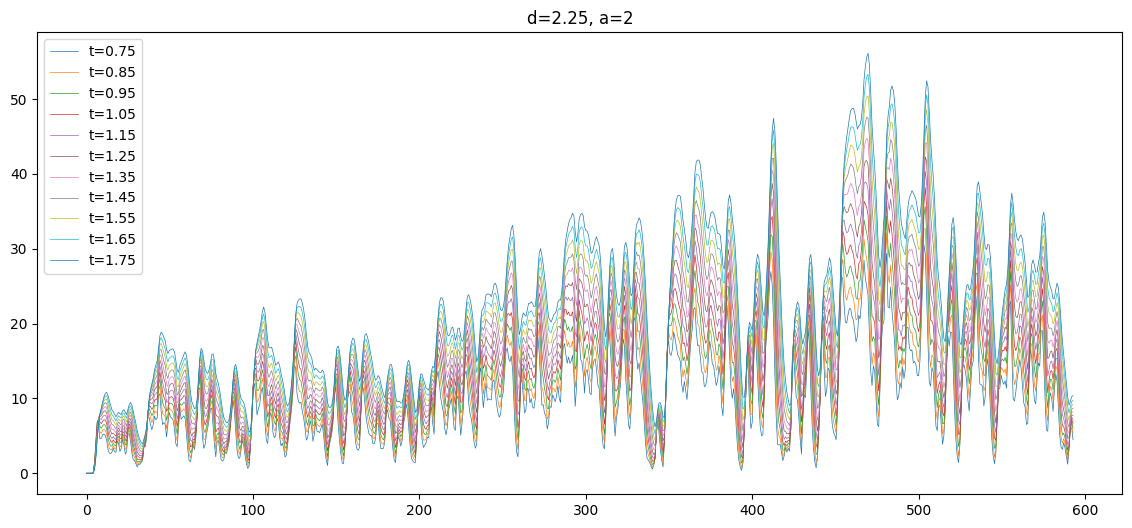

In [73]:
plt.figure(figsize=(14,6))
plt.title(f'd={ideal_delta}, a={ideal_alpha}')
for tau in consistent_step_tau_range:
    fmri_hdr_for_eeg = fmri_hdr_lookup[(ideal_delta, tau, ideal_alpha)]
    plt.plot(
        time_steps_for_fmri, 
        fmri_hdr_for_eeg,
        label=f't={tau:.2f}',
        linewidth=0.5,
    )
plt.legend()
plt.show()


### $\Delta\alpha$

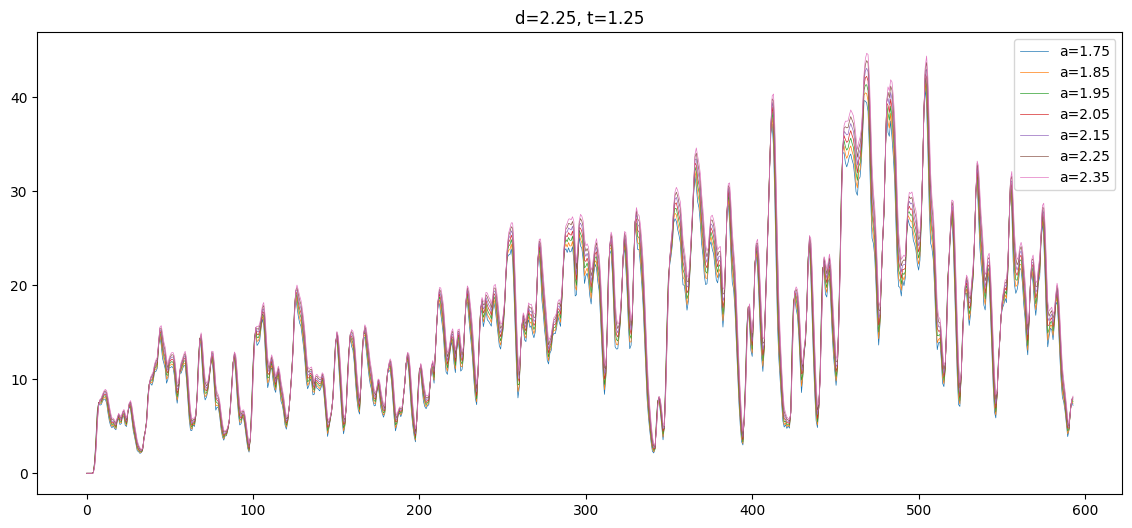

In [74]:
plt.figure(figsize=(14,6))
plt.title(f'd={ideal_delta}, t={ideal_tau}')
for alpha in consistent_step_alpha_range:
    fmri_hdr_for_eeg = fmri_hdr_lookup[(ideal_delta, ideal_tau, alpha)]
    plt.plot(
        time_steps_for_fmri, 
        fmri_hdr_for_eeg,
        label=f'a={alpha:.2f}',
        linewidth=0.5,
    )
plt.legend()
plt.show()

### Zooming in and Multivariable Analysis

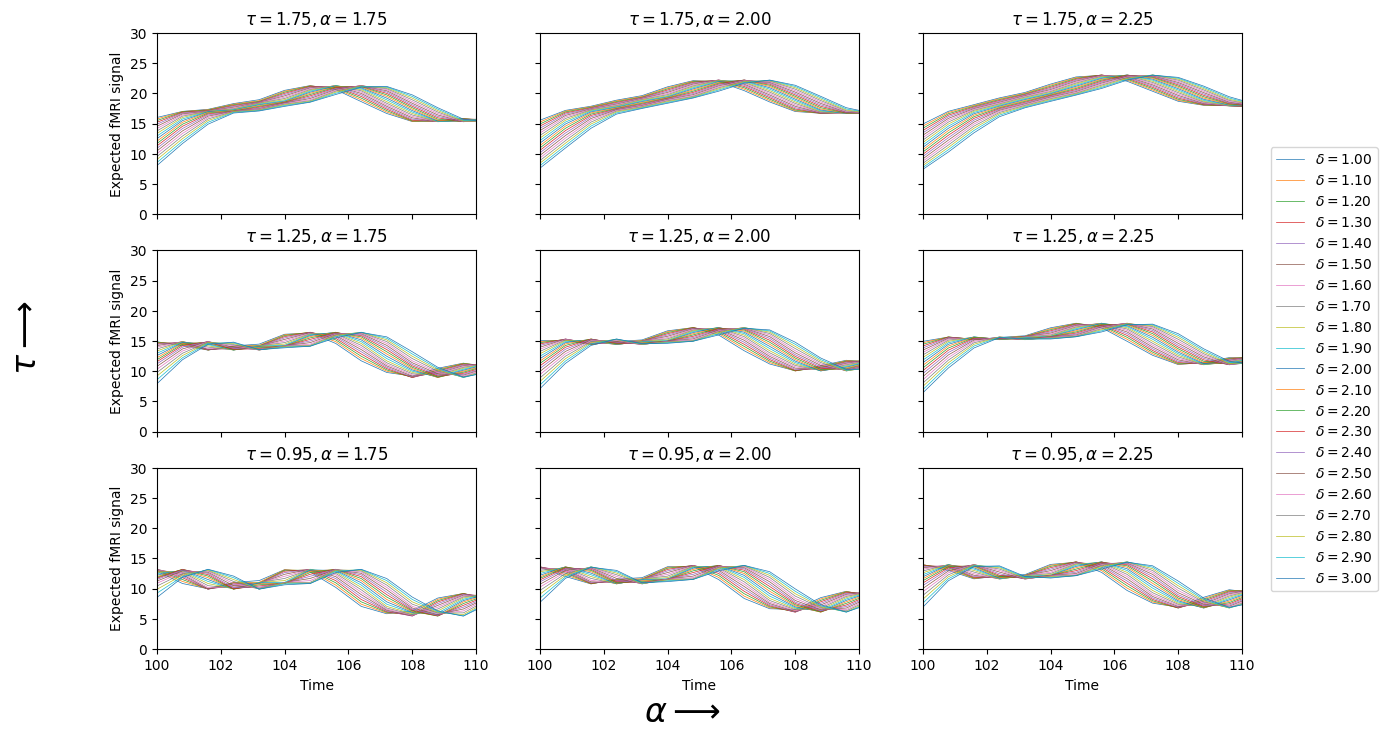

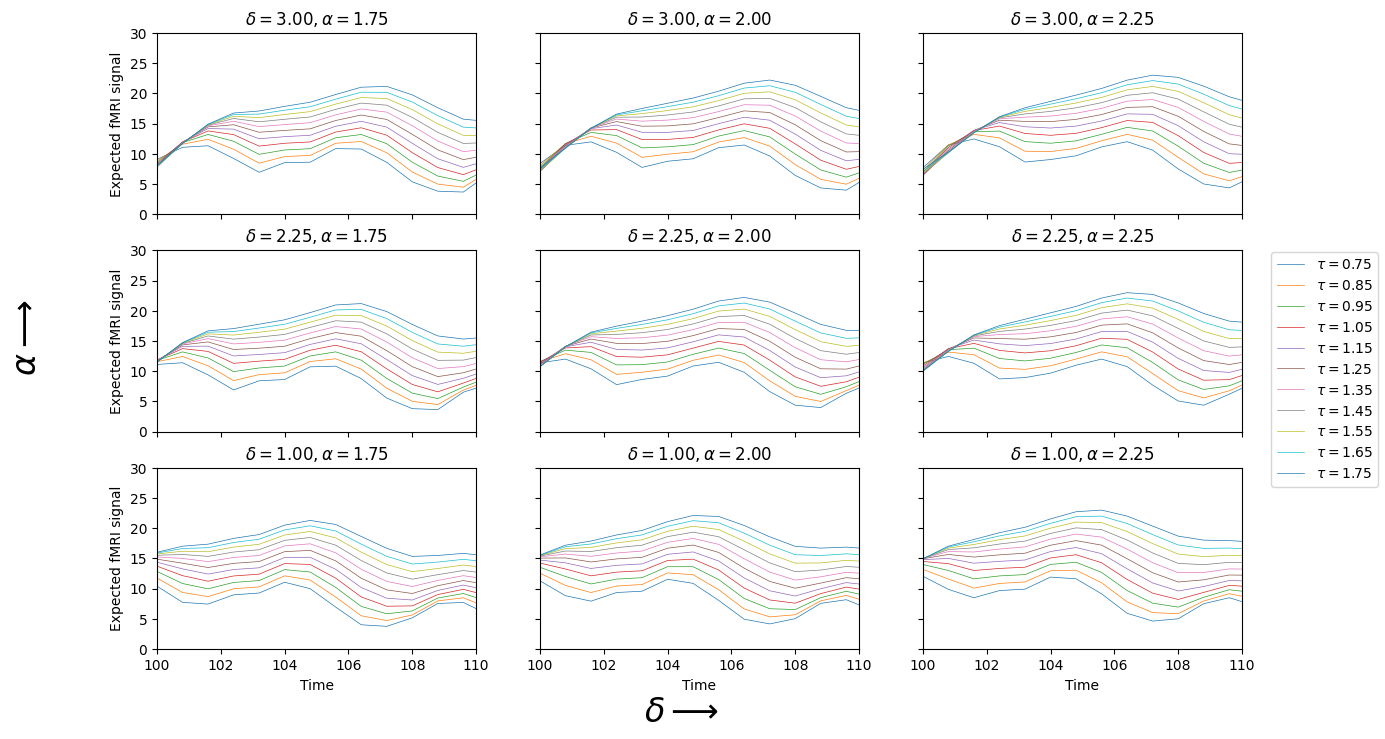

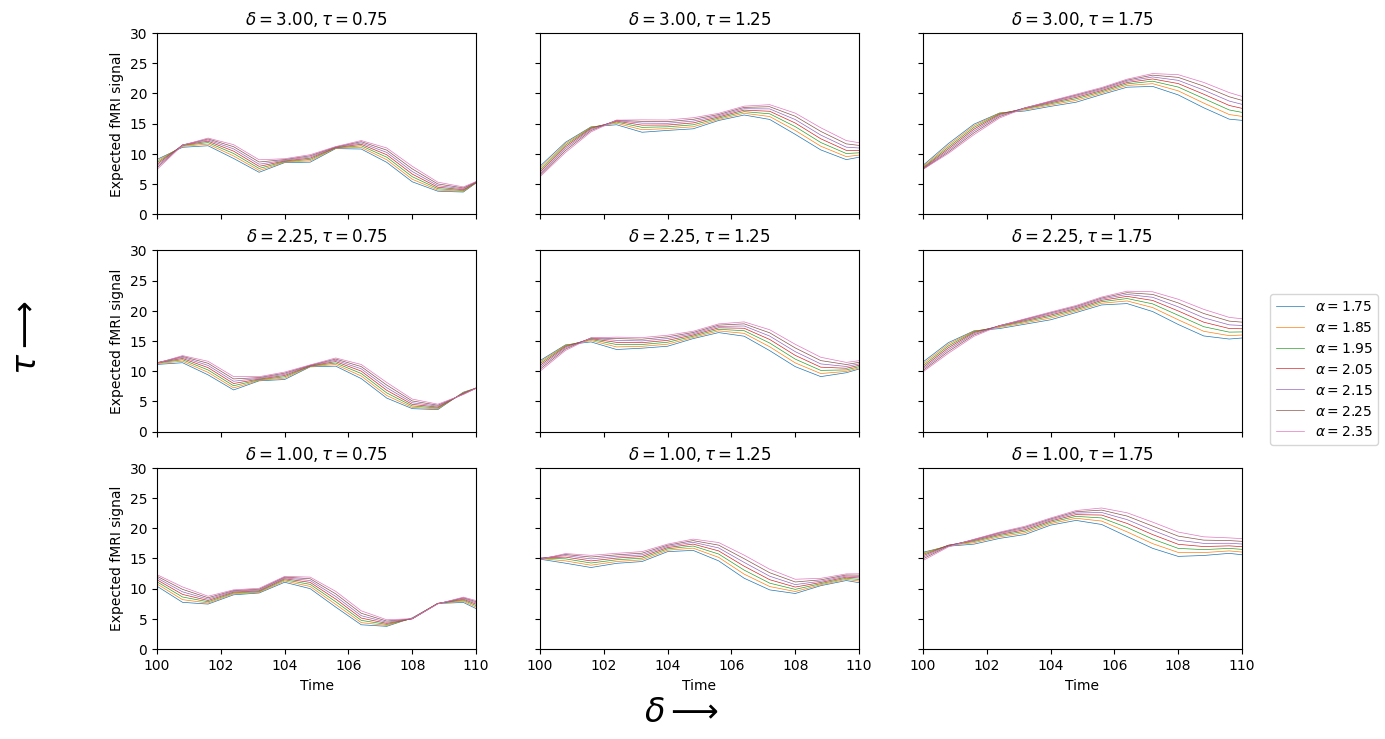

In [107]:
# Zoom in since change is very small
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(14,8))
fig.supxlabel('$\\alpha \longrightarrow$', fontsize=24)
fig.supylabel('$\\tau \longrightarrow$', fontsize=24)
for i, tau in enumerate([expected_tau_range[-1], ideal_tau, expected_tau_range[1]]):
    for j, alpha in enumerate([expected_alpha_range[0], ideal_alpha, expected_alpha_range[-1]]):
        ax = axs[i][j]
        ax.set_title(f'$\\tau={tau:.2f}, \\alpha={alpha:.2f}$')
        for delta in consistent_step_delta_range:
            fmri_hdr_for_eeg = fmri_hdr_lookup[(delta, tau, alpha)]
            ax.plot(
                time_steps_for_fmri, 
                fmri_hdr_for_eeg,
                label=f'$\delta={delta:.2f}$',
                linewidth=0.5,
            )
        ax.set_ylim(0, 30)
        ax.set_xlim(100, 110)
        if i == 2:
            ax.set_xlabel('Time')
        if j == 0:
            ax.set_ylabel('Expected fMRI signal')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')
plt.show()


fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(14,8))
fig.supxlabel('$\delta \longrightarrow$', fontsize=24)
fig.supylabel('$\\alpha \longrightarrow$', fontsize=24)
for i, delta in enumerate([expected_delta_range[-1], ideal_delta, expected_delta_range[0]]):
    for j, alpha in enumerate([expected_alpha_range[0], ideal_alpha, expected_alpha_range[-1]]):
        ax = axs[i][j]
        ax.set_title(f'$\delta={delta:.2f}, \\alpha={alpha:.2f}$')
        for tau in consistent_step_tau_range:
            fmri_hdr_for_eeg = fmri_hdr_lookup[(delta, tau, alpha)]
            ax.plot(
                time_steps_for_fmri, 
                fmri_hdr_for_eeg,
                label=f'$\\tau={tau:.2f}$',
                linewidth=0.5,
            )
        ax.set_ylim(0, 30)
        ax.set_xlim(100, 110)
        if i == 2:
            ax.set_xlabel('Time')
        if j == 0:
            ax.set_ylabel('Expected fMRI signal')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')
plt.show()


fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(14,8))
fig.supxlabel('$\delta \longrightarrow$', fontsize=24)
fig.supylabel('$\\tau \longrightarrow$', fontsize=24)
for i, delta in enumerate([expected_delta_range[-1], ideal_delta, expected_delta_range[0]]):
    for j, tau in enumerate([expected_tau_range[0], ideal_tau, expected_tau_range[-1]]):
        ax = axs[i][j]
        ax.set_title(f'$\delta={delta:.2f}, \\tau={tau:.2f}$')
        for alpha in consistent_step_alpha_range:
            fmri_hdr_for_eeg = fmri_hdr_lookup[(delta, tau, alpha)]
            ax.plot(
                time_steps_for_fmri, 
                fmri_hdr_for_eeg,
                label=f'$\\alpha={alpha:.2f}$',
                linewidth=0.5,
            )
        ax.set_ylim(0, 30)
        ax.set_xlim(100, 110)
        if i == 2:
            ax.set_xlabel('Time')
        if j == 0:
            ax.set_ylabel('Expected fMRI signal')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')
plt.show()


## Load data

In [141]:
# Only select data for model that didn't have missing data
model_name = 'downsample_without_nans_without_nans'
parameters_chosen_by_search = []

for delta in expected_delta_range:
    for tau in expected_tau_range:
        for alpha in expected_alpha_range:
            filename_substring = f'effect_of_ideal_params_delta{delta}_tau{tau}_alpha{alpha}'
            filename_ext = '.csv'
            matching_files = sorted(glob.glob(f'{filename_substring}*{filename_ext}'))
            filename_to_use = matching_files[-1] if len(matching_files) != 0 else None
            if filename_to_use:
                print(f'Loading data from {filename_to_use}...')
                with open(filename_to_use, 'r') as f:
                    df = pd.read_csv(f, index_col=0)
                
                    # Only select data for model that didn't have missing data
                    df_for_model_of_interest = df[df['model_name'] == model_name].drop(columns='model_name')

                    # Get possible noises
                    noises = set()
                    columns = df_for_model_of_interest.columns.to_numpy().astype(str)
                    for column in columns:
                        if 'noise' in column:
                            noises.add(int(column.split('noise')[0]))
                    noises = sorted(list(noises))        

                    # 
                    for noise in noises:
                        columns_to_choose = np.char.startswith(
                            df_for_model_of_interest.columns.to_numpy().astype(str), 
                            f'{noise}noise'
                        )
                        columns_for_noise = df_for_model_of_interest.columns[columns_to_choose]
                        minimum_cost_mask = df_for_model_of_interest[columns_for_noise] == df_for_model_of_interest[columns_for_noise].min()
                        minimum_cost_array = df_for_model_of_interest[columns_for_noise][minimum_cost_mask].to_numpy()

                        for point in zip(*np.where(~np.isnan(minimum_cost_array))):
                            row_of_interest = df_for_model_of_interest.iloc[point[0]]
                            parameters_chosen_by_search.append({
                                'actual_delta': delta,
                                'actual_tau': tau,
                                'actual_alpha': alpha,
                                'chosen_delta': row_of_interest['delta'], 
                                'chosen_tau': row_of_interest['tau'], 
                                'chosen_alpha': row_of_interest['alpha'], 
                                'delta_diff': delta - row_of_interest['delta'],
                                'tau_diff': tau - row_of_interest['tau'],
                                'alpha_diff': alpha - row_of_interest['alpha'],
                                'noise': noise
                            })

chosen_parameters = pd.DataFrame(parameters_chosen_by_search)
        

Loading data from effect_of_ideal_params_delta1_tau0.75_alpha1.75_2023-04-12_19:56.csv...
Loading data from effect_of_ideal_params_delta1_tau0.75_alpha2_2023-04-12_19:49.csv...
Loading data from effect_of_ideal_params_delta1_tau1.25_alpha1.75_2023-04-12_19:24.csv...
Loading data from effect_of_ideal_params_delta1_tau1.25_alpha2_2023-04-12_11:52.csv...
Loading data from effect_of_ideal_params_delta1.25_tau1.25_alpha2_2023-04-12_14:58.csv...
Loading data from effect_of_ideal_params_delta1.5_tau1.25_alpha2_2023-04-12_11:46.csv...
Loading data from effect_of_ideal_params_delta1.75_tau1.25_alpha2_2023-04-12_15:07.csv...
Loading data from effect_of_ideal_params_delta2_tau1.25_alpha2_2023-04-12_15:15.csv...
Loading data from effect_of_ideal_params_delta2.25_tau0.75_alpha2_2023-04-12_10:54.csv...
Loading data from effect_of_ideal_params_delta2.25_tau0.95_alpha2_2023-04-12_13:02.csv...
Loading data from effect_of_ideal_params_delta2.25_tau1.15_alpha2_2023-04-12_14:18.csv...
Loading data from ef

In [142]:
chosen_parameters

,actual_delta,actual_tau,actual_alpha,chosen_delta,chosen_tau,chosen_alpha,delta_diff,tau_diff,alpha_diff,noise
0,1.0,0.75,1.75,1.0,0.75,1.75,0.000000e+00,0.000000e+00,0.000000e+00,0
1,1.0,0.75,1.75,1.0,0.75,1.75,0.000000e+00,0.000000e+00,0.000000e+00,1
2,1.0,0.75,1.75,1.0,0.75,1.75,0.000000e+00,0.000000e+00,0.000000e+00,1
3,1.0,0.75,1.75,1.0,0.75,1.75,0.000000e+00,0.000000e+00,0.000000e+00,1
4,1.0,0.75,1.75,1.0,0.75,1.75,0.000000e+00,0.000000e+00,0.000000e+00,1
...,...,...,...,...,...,...,...,...,...,...
27022,3.0,1.75,2.25,3.0,1.75,2.25,-1.776357e-15,-8.881784e-16,-4.440892e-16,10
27023,3.0,1.75,2.25,3.0,1.75,2.25,-1.776357e-15,-8.881784e-16,-4.440892e-16,10
27024,3.0,1.75,2.25,3.0,1.75,2.25,-1.776357e-15,-8.881784e-16,-4.440892e-16,10
27025,3.0,1.75,2.25,3.0,1.75,2.25,-1.776357e-15,-8.881784e-16,-4.440892e-16,10


In [162]:
groupby_columns = ['noise', 'actual_delta', 'actual_tau', 'actual_alpha']
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.2f}'.format
diff_describe = chosen_parameters[groupby_columns+['delta_diff', 'tau_diff', 'alpha_diff']].round(3).groupby(groupby_columns).describe()

In [169]:
chosen_parameters[groupby_columns+['delta_diff', 'tau_diff', 'alpha_diff']].round(3).groupby(groupby_columns).mean()

delta_diff  tau_diff  alpha_diff
noise actual_delta actual_tau actual_alpha                                  
0     1.00         0.75       1.75                0.00      0.00        0.00
                              2.00                0.00      0.00        0.00
                   1.25       1.75                0.00      0.00        0.00
                              2.00                0.00      0.00        0.00
      1.25         1.25       2.00                0.00      0.00        0.00
      1.50         1.25       2.00                0.00      0.00        0.00
      1.75         1.25       2.00                0.00      0.00        0.00
      2.00         1.25       2.00                0.00      0.00        0.00
      2.25         0.75       2.00                0.00      0.00        0.00
                   0.95       2.00                0.00      0.00        0.00
                   1.15       2.00                0.00      0.00        0.00
                   1.25       1.75                0.00      0.00        0.00
                              1.85                0.00      0.00        0.00
                              1.95                0.00      0.00        0.00
                              2.00                0.00      0.00       -0.25
                              2.05                0.00      0.00        0.00
                              2.15                0.00      0.00        0.00
                              2.25                0.00      0.00        0.00
                   1.35       2.00                0.00      0.00        0.00
                   1.55       2.00                0.00      0.00        0.00
                   1.75       2.00                0.00      0.00        0.00
      2.50         1.25       2.00                0.00      0.00        0.00
      2.75         1.25       2.00                0.00      0.00        0.00
      3.00         1.25       2.00                0.00      0.00        0.00
                              2.25                0.00      0.00        0.00
                   1.75       2.00                0.00      0.00        0.00
                              2.25                0.00      0.00        0.00
1     1.00         0.75       1.75                0.00      0.00       -0.00
                              2.00               -0.02     -0.01        0.06
                   1.25       1.75                0.00      0.01       -0.01
                              2.00               -0.03     -0.02        0.06
      1.25         1.25       2.00                0.01      0.00       -0.01
      1.50         1.25       2.00               -0.00     -0.01        0.01
      1.75         1.25       2.00               -0.01     -0.01        0.03
      2.00         1.25       2.00               -0.00     -0.00        0.00
      2.25         0.75       2.00               -0.01     -0.01        0.04
                   0.95       2.00                0.01      0.01       -0.03
                   1.15       2.00                0.01      0.00       -0.02
                   1.25       1.75                0.03      0.02       -0.05
                              1.85                0.01      0.01       -0.02
                              1.95                0.01      0.01       -0.02
                              2.00               -0.04     -0.02       -0.17
                              2.05                0.00     -0.00       -0.00
                              2.15               -0.01     -0.01        0.03
                              2.25               -0.04     -0.02        0.08
                   1.35       2.00               -0.01     -0.00        0.01
                   1.55       2.00                0.00      0.00       -0.01
                   1.75       2.00                0.04      0.02       -0.06
      2.50         1.25       2.00                0.01     -0.00       -0.01
      2.75         1.25       2.00               -0.00     -0.00        0.00
      3.00         1.25       2.00      

In [ ]:
pd.set_option('display.max_rows', 10)

In [136]:
def plot_progression_along_noise(grouped_df, variable_names=('delta', 'tau', 'alpha')):
    for variable in variable_names:
        fig, axs = plt.subplots(1, 2)
        fig.suptitle(model_name)
        fig.tight_layout()
        axs[0].set_ylabel(variable)
        axs[0].set_xlabel('Noise')
        axs[0] = grouped_df.boxplot(subplots=False, column=variable, rot=45, ax=axs[0], showmeans=True)
        axs[1].set_ylabel(variable)
        axs[1].set_xlabel('Noise')
        axs[1].errorbar(noises, grouped_df.mean()[variable], grouped_df.std()[variable], fmt='ok')
        labels = grouped_df.count()
        labels = [f'{noise}, N={n[0].item()}' for noise, n in zip(labels.index, labels.values)]
        plt.setp(axs[0], xticklabels=labels)
        plt.show()

## Affect of Noise Across all tested ideal parameters

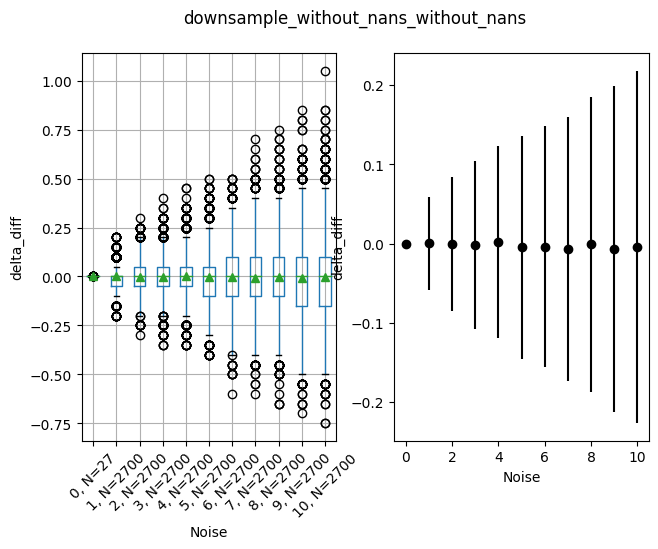

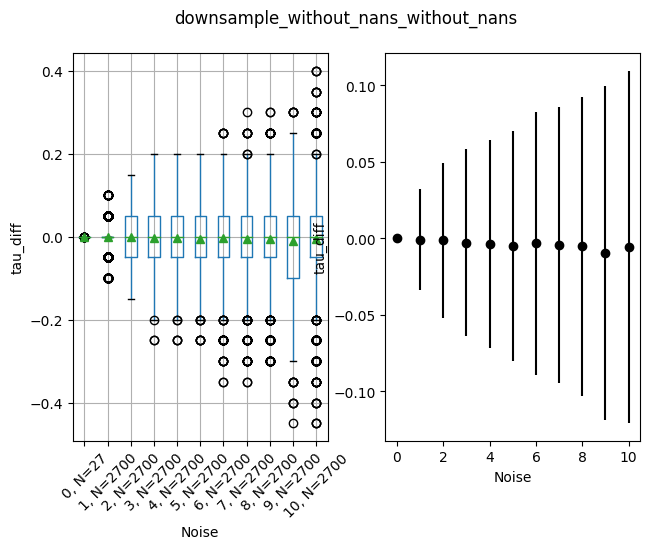

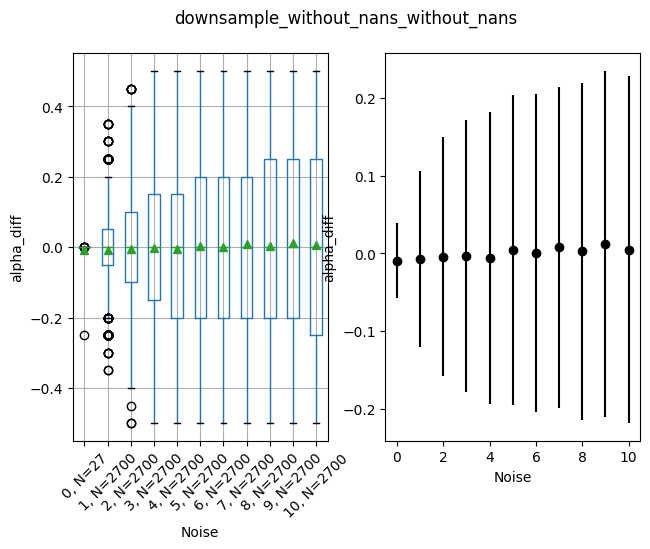

In [170]:
plot_progression_along_noise(
    chosen_parameters[['delta_diff', 'tau_diff', 'alpha_diff', 'noise']].groupby('noise'),
    ['delta_diff', 'tau_diff', 'alpha_diff']
)